<a href="https://colab.research.google.com/github/mateo777pis/estadistica/blob/main/TrabajoEstadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import seaborn as sns
import numpy as np
from scipy.stats import norm, shapiro, skew, kurtosis, spearmanr, kendalltau
from google.colab import files # Para cargar archivos en google colab
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
import plotly.express as px

uploaded = files.upload()




Saving nac2020[1].csv to nac2020[1] (2).csv


In [ ]:
io_csv = io.BytesIO(uploaded['nac2020[1] (2).csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
df = tabla[["EDAD_PADRE", "EDAD_MADRE", "N_HIJOSV", "N_EMB"]]
df.head(3)

,EDAD_PADRE,EDAD_MADRE,N_HIJOSV,N_EMB
COD_DPTO,,,,
44,20,4,1,1
44,20,4,1,1
44,20,5,1,1


In [ ]:
# ¿Cómo se comporta la variable aleatoria de la edad de un padre de un recién nacido en Colombia (EDAD_PADRE)?

<function matplotlib.pyplot.show(close=None, block=None)>

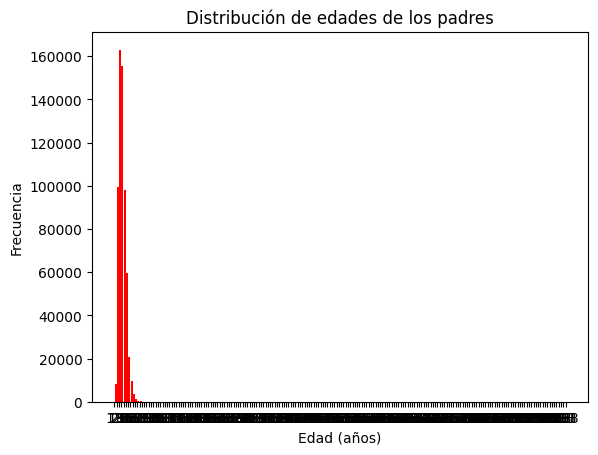

In [ ]:
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE) + 1, 5)
plot.hist(df.EDAD_PADRE, bins=intervalos, color= 'red', rwidth=0.85)
plot.title('Distribución de edades de los padres')
plot.xlabel('Edad (años)')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)
plot.show

In [ ]:
df1 = df[(df.EDAD_PADRE < 120) & (df.EDAD_MADRE != 99) & (df.N_HIJOSV != 99) & (df.N_EMB != 99)]
df1.head(5)

,EDAD_PADRE,EDAD_MADRE,N_HIJOSV,N_EMB
COD_DPTO,,,,
44,20,4,1,1
44,20,4,1,1
44,20,5,1,1
44,20,5,1,1
44,20,3,1,1


<ipython-input-7-d3ae92070f72>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plot.plot(x, p, 'k', linewidth=2, label =  'Distribución normal', color = 'darkblue')


<function matplotlib.pyplot.show(close=None, block=None)>

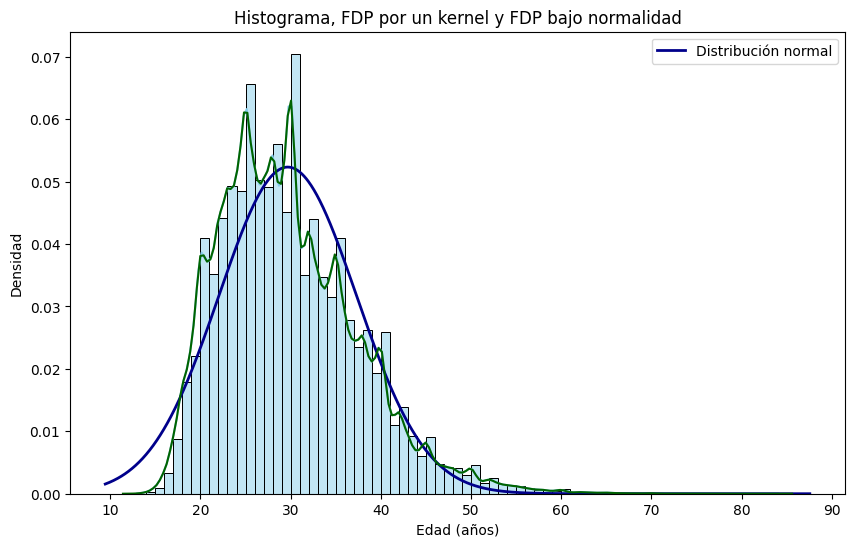

In [ ]:
intervalos = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plot.figure(figsize=(10, 6))
sns.histplot(data=df1, x="EDAD_PADRE", bins=intervalos, kde = True, stat = "density", color= 'skyblue', edgecolor = 'black')
# kde = True es la gráfica de la función de densidad de probabilidad estimada por un método kernell

xmin, xmax = plot.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))

plot.plot(x, p, 'k', linewidth=2, label =  'Distribución normal', color = 'darkblue')
sns.kdeplot(x = df1.EDAD_PADRE, color = 'darkgreen')

plot.title('Histograma, FDP por un kernel y FDP bajo normalidad')
plot.xlabel('Edad (años)')
plot.ylabel('Densidad')
plot.legend()
plot.show

Sea $X:=$ Edad del padre de un recién nacido en Colombia.

 Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método kernell (color verde), no coincide con la función de probabilidad asumiendo el supuesto de normalidad (línea azul),
 $X\sim \text{Normal} (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, por tanto no asumimos normalidad.

In [ ]:
shapiro(df1.EDAD_PADRE)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9588152766227722, pvalue=0.0)

* Si el **valor p** en una prueba de hipótesis es menor a 0.05, se rechaza la hipótesis nula con la confianza del 95%
* Si el **valor p** en una prueba de hipótesis es mayor a 0.05, no se rechaza la hipótesis nula con la confianza del 95%

En nuestro caso tenemos que pvalue=0.0 < 0.05, es decir, se rechaza que la variable aleatoria $X$, la cual corresponde a la edad de un padre de un recién nacido en Colombia presenta distribución normal.

In [ ]:
df1.EDAD_PADRE.count()
len(df1.EDAD_PADRE)
idx = np.random.randint(len(df1.EDAD_PADRE), size=100)
shapiro(df1.EDAD_PADRE.index[idx])

ShapiroResult(statistic=0.8363077640533447, pvalue=3.820017635547401e-09)

Como el valor p (igual a $1.1929814718314447 \times 10^{-6}$) es menor que 0.05, entonces se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal.

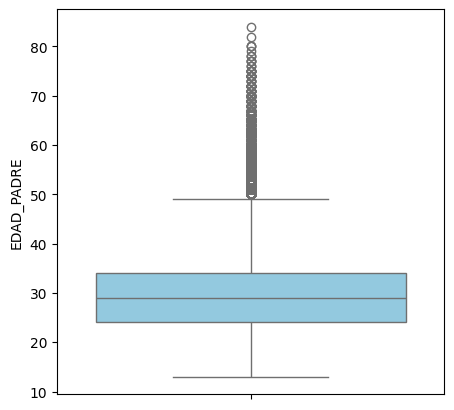

In [ ]:
plot.figure(figsize=(5, 5))
sns.boxplot(df1.EDAD_PADRE, color = 'skyblue', saturation = 0.75)
plot.show()

Se considera que la edad de un padre de un recién nacido en Colombia es atípica si es mayor que 50 años. El primer cuartil es aproximadamente en 25 años, la media aritmética es aproximadamente 29 años y el tercer cuartil es aproximadamente 35 años.
$\text{Rango Intercuartílico = Tercer cuartil - Primer cuartil} = 35 - 25 = 10$

In [ ]:
plot.figure(figsize=(5, 5))
fig = px.strip(df1.EDAD_PADRE, orientation = 'h')
fig.show()

De acuerdo con el diagrama de puntos se observa una alta variabilidad de la edad de un padre de un recién nacido en Colombia.

In [ ]:
print(f"Media: {np.mean(df1.EDAD_PADRE)}")
print(f"Varianza: {np.var(df1.EDAD_PADRE)} y la desviación estándar es de {np.std(df1.EDAD_PADRE)}")
print(f"Asimetría: {skew(df1.EDAD_PADRE)}")
print(f"Curtosis: {kurtosis(df1.EDAD_PADRE)}")

Media: 29.677295875159494
Varianza: 58.13789861018038 y la desviación estándar es de 7.624821218243768
Asimetría: 0.8352990464451435
Curtosis: 0.9739082717645751


* Aproximadamente el promedio de la edad de un padre de un recién nacido en Colombia es de 29.7 años.
* Aproximadamente la distancia entre los valores de la edad de un padre de un recién nacido en Colombia y la media es de 7.6 años.
* La distribución de la edad de un padre de un recién nacido en Colombia es positiva, es decir, la media es mayor que la moda de la variable aleatoria.
* La distribución es platicuritca, es decir, hay una baja concentración de las edades de un padre de un recién nacido en Colombia con respecto a la media.

In [ ]:
# ¿Cómo se comporta la variable aleatoria del número de embarazos incluido el presente (N_EMB)?

<function matplotlib.pyplot.show(close=None, block=None)>

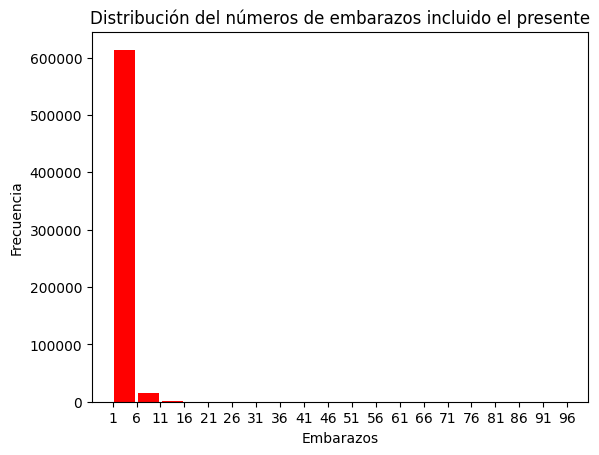

In [ ]:
intervalos = range(min(df.N_EMB), max(df.N_EMB) + 1, 5)
plot.hist(df.N_EMB, bins=intervalos, color= 'red', rwidth=0.85)
plot.title('Distribución del números de embarazos incluido el presente')
plot.xlabel('Embarazos')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)
plot.show

<ipython-input-13-45c5042a534f>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plot.plot(x, p, 'k', linewidth=2, label =  'Distribución normal', color = 'darkblue')


<function matplotlib.pyplot.show(close=None, block=None)>

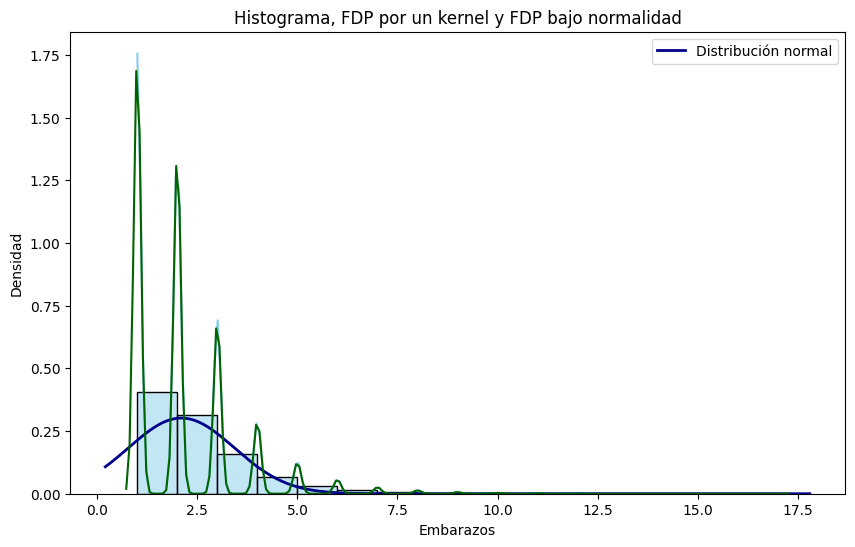

In [ ]:
intervalos = range(min(df1.N_EMB), max(df1.N_EMB) + 1)
plot.figure(figsize=(10, 6))
sns.histplot(data=df1, x="N_EMB", bins=intervalos, kde = True, stat = "density", color= 'skyblue', edgecolor = 'black')
# kde = True es la gráfica de la función de densidad de probabilidad estimada por un método kernell

xmin, xmax = plot.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB))

plot.plot(x, p, 'k', linewidth=2, label =  'Distribución normal', color = 'darkblue')
sns.kdeplot(x = df1.N_EMB, color = 'darkgreen')

plot.title('Histograma, FDP por un kernel y FDP bajo normalidad')
plot.xlabel('Embarazos')
plot.ylabel('Densidad')
plot.legend()
plot.show

Sea $X:=$ Número de embarazos incluido el presente.

 Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método kernell (color verde), no coincide con la función de probabilidad asumiendo el supuesto de normalidad (línea azul),
 $X\sim \text{Normal} (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, por tanto no asumimos normalidad.

In [ ]:
shapiro(df1.N_EMB)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.774432361125946, pvalue=0.0)

* Si el **valor p** en una prueba de hipótesis es menor a 0.05, se rechaza la hipótesis nula con la confianza del 95%
* Si el **valor p** en una prueba de hipótesis es mayor a 0.05, no se rechaza la hipótesis nula con la confianza del 95%

En nuestro caso tenemos que pvalue=0.0 < 0.05, es decir, se rechaza que la variable aleatoria $X$, la cual corresponde al número de embarazos incluido el presente en Colombia presenta distribución normal.

In [ ]:
df1.N_EMB.count()
len(df1.N_EMB)
idx = np.random.randint(len(df1.N_EMB), size=100)
shapiro(df1.N_EMB.index[idx])

ShapiroResult(statistic=0.8290696740150452, pvalue=2.1502781777371638e-09)

Como el valor p (igual a  2.8387180606159745×10−8 ) es menor que 0.05, entonces se rechaza que la variable aleatoria del número de embarazos incluido el presente en Colombia presenta distribución normal.

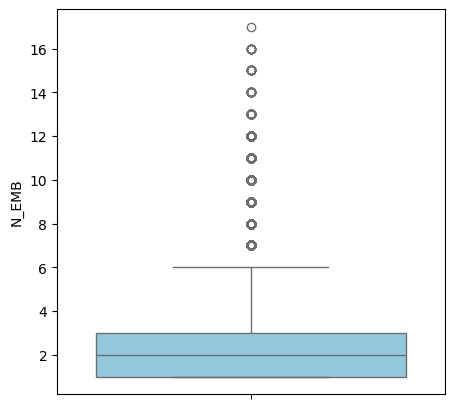

In [ ]:
plot.figure(figsize=(5, 5))
sns.boxplot(df1.N_EMB, color = 'skyblue', saturation = 0.75)
plot.show()

Se considera que el número de embarazos incluido el presente en Colombia es atípica si es mayor que 6 embarazos. El primer cuartil es aproximadamente en 1 embarazo, la media aritmética es aproximadamente 2 embarazos y el tercer cuartil es aproximadamente 3 embarazos.  Rango Intercuartílico = Tercer cuartil - Primer cuartil=3−1=2

In [ ]:
plot.figure(figsize=(5, 5))
fig = px.strip(df1.N_EMB, orientation = 'h')
fig.show()

De acuerdo con el diagrama de puntos se observa una alta variabilidad de la edad de un padre de un recién nacido en Colombia.

In [ ]:
print(f"Media: {np.mean(df1.N_EMB)}")
print(f"Varianza: {np.var(df1.N_EMB)} y la desviación estándar es de {np.std(df1.N_EMB)}")
print(f"Asimetría: {skew(df1.N_EMB)}")
print(f"Curtosis: {kurtosis(df1.N_EMB)}")

Media: 2.102028142023174
Varianza: 1.7488844977183355 y la desviación estándar es de 1.3224539680905099
Asimetría: 1.9222980439592752
Curtosis: 6.016463802431733


* Aproximadamente el promedio del número de embarazos incluido el presente en Colombia es de 2.1 embarazos.
* Aproximadamente la distancia entre los valores del número de embarazos incluido el presente en Colombia y la media es de 7.6 años.
* La distribución del número de embarazos incluido el presente en Colombia es positiva, es decir, la media es mayor que la moda de la variable aleatoria.
* La distribución es leptocúrtica, es decir, hay una alta concentración del número de embarazos incluido el presente en Colombia con respecto a la media.

In [ ]:
# ¿Están correlacionadas y qué grado de correlación tienen ambas variables?

* Diagrama de dispersión y la recta de regresión para datos bivariados


Vamos a determinar si una variable está correlacionada o depende de otra variable.

Una variable depende de la otra, cuando la ejecución de esta se ve afectada por la variable indpendiente. Ejemplo: El precio de una vivienda depende del número de habitaciones, ya que entre más habitaciones se tiene mayor precio.
Una variable está correlacionada con otra, cuando guardan cierta relación, pero no es posible hablar de dependencia. Ejemplo: Consumo de arroz y de carne, ya que se ha visto que al comerse más arroz se come más carne, pero no hay una dependencia entre estas dos variables.

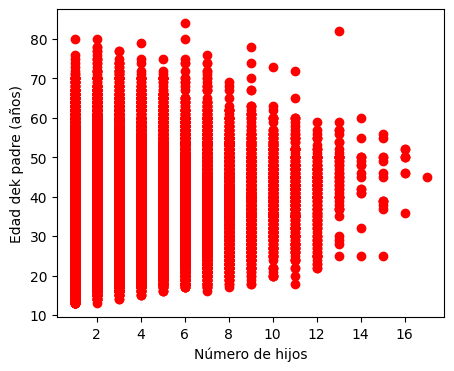

In [ ]:
plot.figure(figsize=(5, 4))
plot.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color = 'red', marker = 'o')
plot.xlabel('Número de hijos')
plot.ylabel('Edad dek padre (años)')
plot.show()

Se observa en el diagrama de dispersión una nube de puntos sin un patrón particular, esto quiere decir que las variables son independientes o no están correlacionadas. Para nuestro ejemplo quiere decir que el número de embarazos, incluido el presente y la edad de un padre no están correlacionados (padre joven con un alto número de embarazos presentes o padre mayor con un bajo número de embarazos presentes)

In [ ]:
modelo = LinearRegression()
# df1["N_EMB"] = df1.N_EMB
modelo.fit(np.array(df1.N_EMB).reshape(-1,1), np.array(df1["EDAD_PADRE"]).reshape(-1,1))
predi_lineal = modelo.predict(np.array(df1["N_EMB"]).reshape(-1,1))
predi_lineal

array([[27.43381145],
       [27.43381145],
       [27.43381145],
       ...,
       [29.46958925],
       [27.43381145],
       [27.43381145]])

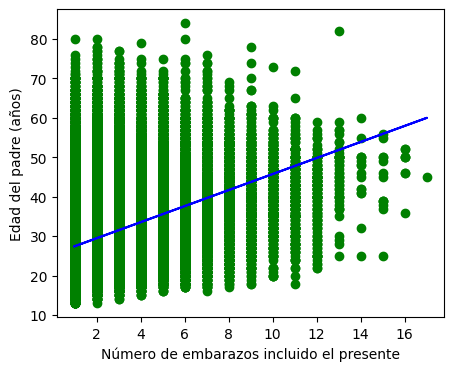

In [ ]:
plot.figure(figsize=(5, 4))
plot.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color = 'green', marker = 'o')
plot.plot(df1["N_EMB"], predi_lineal, color = 'blue')
plot.xlabel('Número de embarazos incluido el presente')
plot.ylabel('Edad del padre (años)')
plot.show()

De acuerdo con la recta de regresión se determina una correlación positiva, es decir, que entre más número de embarazos tiene una persona en Colombia, más años tiene un padre de un recién nacido en Colombia.
*La variables y depende postivamente de la variable X, es decir, entre mayor valor de X se tenga, mayor será el valor de Y*

In [ ]:
# grado de correlación
coef_pearson = np.corrcoef(df1.N_EMB, df1.EDAD_PADRE)[0,1]
coef_spearman = spearmanr(df1.N_EMB, df1.EDAD_PADRE)[0]
coef_kendall = kendalltau(df1.N_EMB, df1.EDAD_PADRE)[0]
print(f"Coeficiente de correlación de Pearson, Spearman y Kendall son respectivamente: {coef_pearson}, {coef_spearman} y {coef_kendall}")

Coeficiente de correlación de Pearson, Spearman y Kendall son respectivamente: 0.35308662937499635, 0.3799819483321599 y 0.29696047306817885


Para la interpretación de los coeficientes de relación nos ayudaremos de la referencia:

Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Link](https://pdfs.semanticscholar.org/7e73/43a5608fff1c68c5259db0c77b9193f1546d.pdf)




*   X y Y son independientes o no están correlacionadas: $\rho (X,Y) ≈ 0, \eta (X,Y) ≈ 0, \kappa (X,Y) ≈ 0$
*   Y depende insignificantemente de X o X y Y están correlacionadas insignificantemente si: $0 < \vert \rho (X,Y) \vert < 0.2$, $0 < \vert \eta (X,Y) \vert < 0.2$, $0 < \vert \kappa (X,Y) \vert < 0.2$
*   Y depende discretamente de X o X y Y están correlacionadas discretamente si: $0.2 < \vert \rho (X,Y) \vert < 0.4$, $0.2 < \vert \eta (X,Y) \vert < 0.4$, $0.2 < \vert \kappa (X,Y) \vert < 0.4$
*   Y depende moderadamente de X o X y Y están correlacionadas moderadamente si: $0.4 < \vert \rho (X,Y) \vert < 0.6$, $0.4 < \vert \eta (X,Y) \vert < 0.6$, $0.4 < \vert \kappa (X,Y) \vert < 0.6$
*   Y depende sustancialmente de X o X y Y están correlacionadas sustancialmente si: $0.6 < \vert \rho (X,Y) \vert < 0.8$, $0.6 < \vert \eta (X,Y) \vert < 0.8$, $0.6 < \vert \kappa (X,Y) \vert < 0.8$
*   Y depende fuertemente de X o X y Y están correlacionadas fuertemente si: $0.8 < \vert \rho (X,Y) \vert < 1$, $0.8 < \vert \eta (X,Y) \vert < 1$, $0.8 < \vert \kappa (X,Y) \vert < 1$




De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el número de embarazos, incluido el presente y la edad de un padre de un crecién nacido en Colombia están discretamente relacionadas.

# CONCLUSIONES.



1. La media aritmética de la edad de los padres de recién nacidos en Colombia es aproximadamente 28 años.

2. Existe una correlación positiva entre la edad de un padre y el número de hijos que tiene; es decir, a mayor cantidad de hijos, mayor es la edad del padre.

3. Se identificaron datos atípicos en la variable de edad de los padres de recién nacidos, como el caso de hombres mayores de 50 años. Estos casos pueden deberse a diversos factores físicos, económicos, sociales y culturales, entre otros.

4. La media del número de embarazos, incluyendo el actual, en Colombia es aproximadamente 2.

5. Aunque existe una alta concentración en el número de embarazos respecto a la media, datos del Ministerio de Salud indican una disminución de embarazos en adolescentes.
